In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('fake reviews dataset.csv')
df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [4]:
df.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [6]:
df.describe()

,rating
count,40432.000000
mean,4.256579
std,1.144354
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
df['rating'].value_counts()

5.0    24559
4.0     7965
3.0     3786
1.0     2155
2.0     1967
Name: rating, dtype: int64

ValueError: 'explode' must be of length 'x'

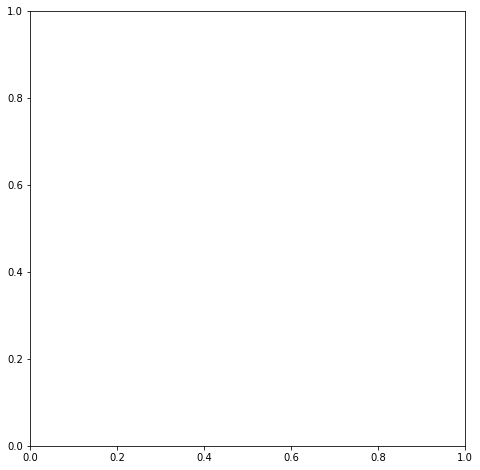

In [39]:
plt.figure(figsize=(15,8))
labels = df['label'].value_counts().keys()
values = df['label'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each label',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

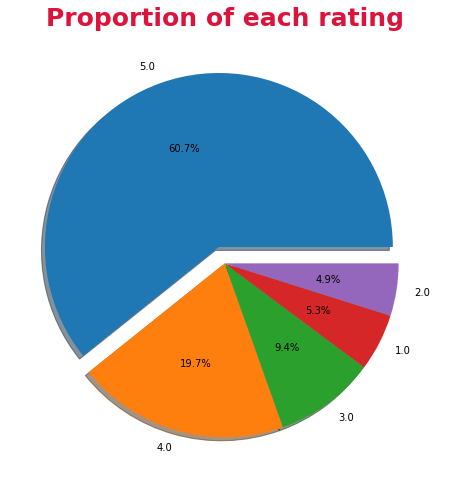

In [40]:
plt.figure(figsize=(15,8))
labels = df['rating'].value_counts().keys()
values = df['rating'].value_counts().values
explode = (0.1,0,0,0,0)
plt.pie(values,labels=labels,explode=explode,shadow=True,autopct='%1.1f%%')
plt.title('Proportion of each rating',fontweight='bold',fontsize=25,pad=20,color='crimson')
plt.show()

In [9]:
nltk.download('stopwords')

def clean_text(text):
    nopunc = [w for w in text if w not in string.punctuation]
    nopunc = ''.join(nopunc)
    return  ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
df['text_'][0], clean_text(df['text_'][0])

('Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty',
 'Love Well made sturdy comfortable love itVery pretty')

In [11]:
df['text_'].head().apply(clean_text)

0    Love Well made sturdy comfortable love itVery ...
1    love great upgrade original Ive mine couple years
2              pillow saved back love look feel pillow
3          Missing information use great product price
4                 nice set Good quality set two months
Name: text_, dtype: object

In [12]:
df.shape

(40432, 4)

In [13]:
df['text_'] = df['text_'].astype(str)

In [14]:
nltk.download('punkt')
def preprocess(text):
    return ' '.join([word for word in word_tokenize(text) if word not in stopwords.words('english') and not word.isdigit() and word not in string.punctuation])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
preprocess(df['text_'][4])

'Very nice set Good quality We set two months'

In [16]:
df['text_'][:10000] = df['text_'][:10000].apply(preprocess)

In [17]:
df['text_'][10001:20000] = df['text_'][10001:20000].apply(preprocess)

In [18]:
df['text_'][20001:30000] = df['text_'][20001:30000].apply(preprocess)

In [19]:
df['text_'][30001:40000] = df['text_'][30001:40000].apply(preprocess)

In [20]:
df['text_'][40001:40432] = df['text_'][40001:40432].apply(preprocess)

In [21]:
df['text_'] = df['text_'].str.lower()

In [22]:
stemmer = PorterStemmer()
def stem_words(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
df['text_'] = df['text_'].apply(lambda x: stem_words(x))

In [23]:
lemmatizer = WordNetLemmatizer()
def lemmatize_words(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])
df["text_"] = df["text_"].apply(lambda text: lemmatize_words(text))

In [24]:
df['text_'].head()

0    love well made sturdi comfort i love veri pretti
1      love great upgrad origin i 've mine coupl year
2        thi pillow save back i love look feel pillow
3               miss inform use great product price i
4         veri nice set good qualiti we set two month
Name: text_, dtype: object

In [25]:
df.head(5)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month


In [26]:
df['category'].unique()

array(['Home_and_Kitchen_5', 'Sports_and_Outdoors_5', 'Electronics_5',
       'Movies_and_TV_5', 'Tools_and_Home_Improvement_5',
       'Pet_Supplies_5', 'Kindle_Store_5', 'Books_5', 'Toys_and_Games_5',
       'Clothing_Shoes_and_Jewelry_5'], dtype=object)

In [27]:
df['rating'].unique()

array([5., 1., 3., 2., 4.])

In [28]:
df.to_csv('Preprocessed Fake Reviews Detection Dataset-1.csv')

In [29]:
df[df['label']=='OR'].head(10)

,category,rating,label,text_
55,Home_and_Kitchen_5,5.0,OR,these perfect exactli i look
56,Home_and_Kitchen_5,5.0,OR,such great purchas ca n't beat price
57,Home_and_Kitchen_5,5.0,OR,what say -- cheap work intend
58,Home_and_Kitchen_5,5.0,OR,these nice sturdi like color choic
59,Home_and_Kitchen_5,5.0,OR,it nice bowl fast ship
60,Home_and_Kitchen_5,5.0,OR,great cup will last forev keep thing cool warm
61,Home_and_Kitchen_5,5.0,OR,love thought would bit bigger
62,Home_and_Kitchen_5,5.0,OR,excel qualiti product perfect ccozinha
63,Home_and_Kitchen_5,5.0,OR,thi fan realli pretti i actual use
64,Home_and_Kitchen_5,1.0,OR,super rough soft wash cloth like bar towel


In [30]:
from nltk.sentiment import SentimentIntensityAnalyzer
# Download NLTK resources (if needed)
nltk.download('vader_lexicon')
# Initialize Sentiment Intensity Analyzer
sid = SentimentIntensityAnalyzer()
text_data=df['text_']
# Function to get sentiment category based on compound score
def get_sentiment_category(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Apply sentiment analysis and store results in a new column
sentiment_scores = text_data.apply(lambda text: sid.polarity_scores(text)['compound'])
df['sentiment_score'] = sentiment_scores
df['sentiment_category'] = sentiment_scores.apply(get_sentiment_category)

# Save the updated dataframe back to CSV (if needed)
df.to_csv('updated_dataset.csv', index=False)


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...


In [31]:
df.head(10)

,category,rating,label,text_,sentiment_score,sentiment_category
0,Home_and_Kitchen_5,5.0,CG,love well made sturdi comfort i love veri pretti,0.9186,positive
1,Home_and_Kitchen_5,5.0,CG,love great upgrad origin i 've mine coupl year,0.8519,positive
2,Home_and_Kitchen_5,5.0,CG,thi pillow save back i love look feel pillow,0.8126,positive
3,Home_and_Kitchen_5,1.0,CG,miss inform use great product price i,0.5423,positive
4,Home_and_Kitchen_5,5.0,CG,veri nice set good qualiti we set two month,0.6908,positive
5,Home_and_Kitchen_5,3.0,CG,i want differ flavor but they are not,0.0387,neutral
6,Home_and_Kitchen_5,5.0,CG,they perfect touch thing i wish littl space,0.7506,positive
7,Home_and_Kitchen_5,3.0,CG,these done fit well look great i love smooth e...,0.9169,positive
8,Home_and_Kitchen_5,5.0,CG,great big number easi read thing i n't like size,0.5090,positive
9,Home_and_Kitchen_5,5.0,CG,my son love comfort well made we also babi,0.8316,positive


In [32]:
sentiment_counts = df['sentiment_category'].value_counts()
sentiment_counts

positive    34062
negative     3600
neutral      2770
Name: sentiment_category, dtype: int64

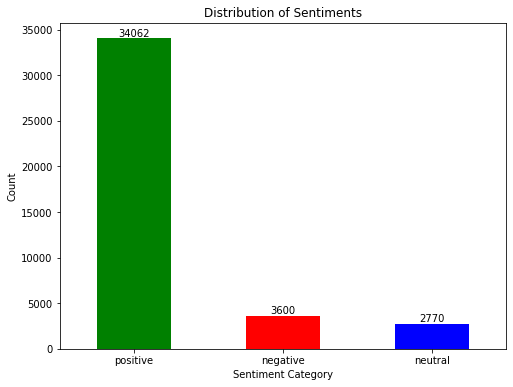

In [33]:
# Set up the figure and axis
plt.figure(figsize=(8, 6))
ax = sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])

# Customize the plot
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')

# Display the counts on top of each bar
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Show the plot
plt.xticks(rotation=0)
plt.show()


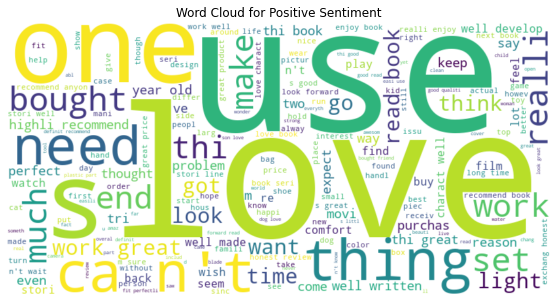

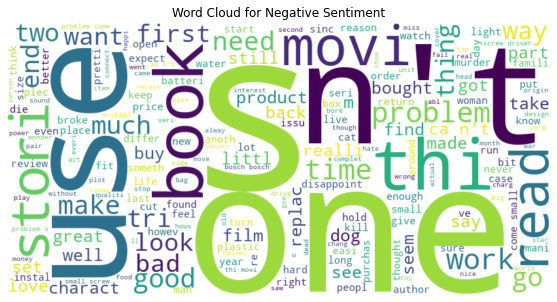

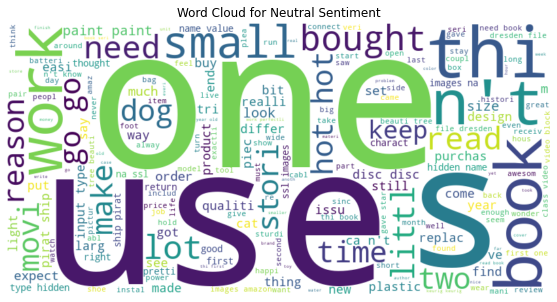

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Define a function to generate word cloud for a specific sentiment category
def generate_word_cloud(sentiment_category):
    text_data_category = ' '.join(df[df['sentiment_category'] == sentiment_category]['text_'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data_category)
    
    # Plot word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {sentiment_category.capitalize()} Sentiment')
    plt.axis('off')
    plt.show()

# Generate word clouds for each sentiment category
generate_word_cloud('positive')
generate_word_cloud('negative')
generate_word_cloud('neutral')
